### Discription of analysis:
- I will add this later, when it's ready to publish

In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#importing data
data = pd.read_csv('data/Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
#standardizing data
col = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
desc = data[col]
scaler = StandardScaler().fit(desc.values)
desc = scaler.transform(desc.values)
data_scaled = pd.DataFrame(desc, columns = col)

#Making gender a binary variable: male = 1 & female = 0
gender = data['Gender']
data_tidy = data_scaled.join(gender)
data_tidy = pd.get_dummies(data_tidy, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
data_tidy.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0


Text(0, 0.5, 'SSE')

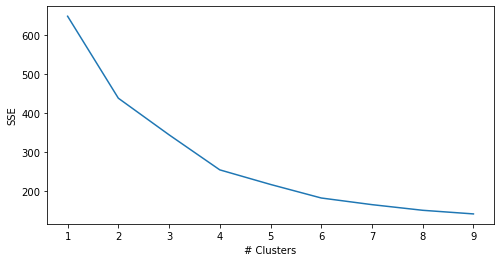

In [19]:
#computing sse for varying numbers of clusters
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_tidy)
    SSE.append(kmeans.inertia_)

#creating a data fram of the results:
data_clusters = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(data_clusters['Cluster'], data_clusters['SSE'])
plt.xlabel('# Clusters')
plt.ylabel('SSE')

The elbow occurs at k = 4. 
Next steps of analysis will be done with 4 clusters

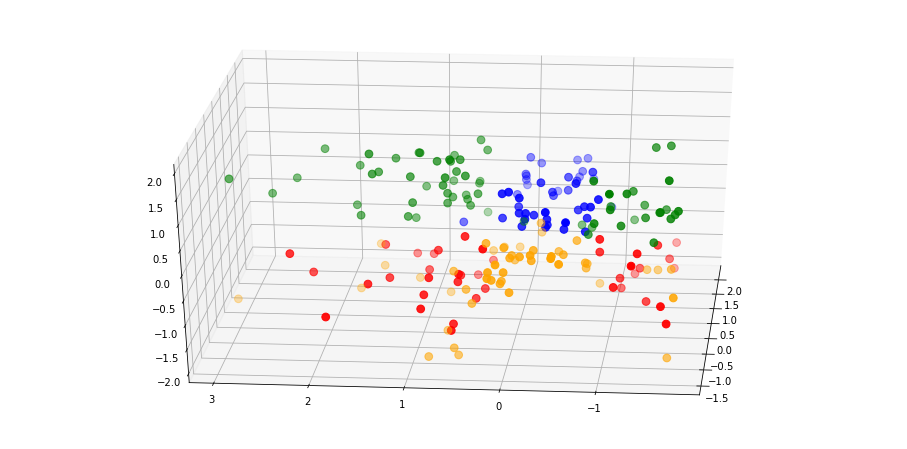

In [31]:
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(data_tidy)
clusters = kmeans.fit_predict(data_tidy.iloc[:,1:])
data_tidy["label"] = clusters
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tidy.Age[data_tidy.label == 0], data_tidy["Annual Income (k$)"][data_tidy.label == 0], data_tidy["Spending Score (1-100)"][data_tidy.label == 0], c='blue', s=60)

ax.scatter(data_tidy.Age[data_tidy.label == 1], data_tidy["Annual Income (k$)"][data_tidy.label == 1], data_tidy["Spending Score (1-100)"][data_tidy.label == 1], c='red', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 2], data_tidy["Annual Income (k$)"][data_tidy.label == 2], data_tidy["Spending Score (1-100)"][data_tidy.label == 2], c='green', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 3], data_tidy["Annual Income (k$)"][data_tidy.label == 3], data_tidy["Spending Score (1-100)"][data_tidy.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

There is some overlap between the clusters, especially the bottom two. Will do PCA then knn again to see if it can be fixed